### 텍스트 분류는 특정 문서의 분류를 학습 데이터를 통해 학습해 모델을 생성한 뒤 이 학습 모델을 이용해 다른 문서의 분류를 예측하는 것
 - 텍스트를 피처 벡터화로 변환하면 일반적으로 희소 행렬 형태가 된다
 - 이러한 희소 행렬에 분류를 효과적으로 잘 처리할 수 있는 알고리즘은 로지스틱 회귀, 선형 서포트 벡터 머신, 나이브 베이즈 등이 있다.
 - 텍스트 기반 분류를 수행할 때는 먼저 텍스트를 정규화한 뒤 피처 벡터화를 적용함
 - 그 이후에 적합한 머신러닝 알고리즘을 적용해 예측 성능을 비교한다.

In [1]:
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups(subset='all',random_state=156)
news_data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

### 텍스트 정규화

In [2]:
# Target 클래스 구성
import pandas as pd
pd.Series(news_data.target).value_counts().sort_index()
# Target 클래스 값은 0~19까지 구성되어 있음

0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
dtype: int64

In [3]:
news_data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
# 개별 데이터가 텍스트로 어떻게 구성되어 있는지 확인
news_data.data[0]

# 제목, 작성자, 소속, 이메일, 내용 등 다양한 정보를 가짐
# 이 중에서 내용을 제외한 다른 정보는 제거한다 
# 제목, 소속, 이메일 주소 등의 헤더와 푸터 정보들은 Target 클래스 값과 유사한 데이터를 가지고 있는 경우가 많아 높은 예측 성능을 보일 수 있음)

'From: egreen@east.sun.com (Ed Green - Pixel Cruncher)\nSubject: Re: Observation re: helmets\nOrganization: Sun Microsystems, RTP, NC\nLines: 21\nDistribution: world\nReply-To: egreen@east.sun.com\nNNTP-Posting-Host: laser.east.sun.com\n\nIn article 211353@mavenry.altcit.eskimo.com, maven@mavenry.altcit.eskimo.com (Norman Hamer) writes:\n> \n> The question for the day is re: passenger helmets, if you don\'t know for \n>certain who\'s gonna ride with you (like say you meet them at a .... church \n>meeting, yeah, that\'s the ticket)... What are some guidelines? Should I just \n>pick up another shoei in my size to have a backup helmet (XL), or should I \n>maybe get an inexpensive one of a smaller size to accomodate my likely \n>passenger? \n\nIf your primary concern is protecting the passenger in the event of a\ncrash, have him or her fitted for a helmet that is their size.  If your\nprimary concern is complying with stupid helmet laws, carry a real big\nspare (you can put a big or small 

In [5]:
len(news_data.data)

18846

[과제] 다음 사항을 수행하세요.
- 피처 벡터화(카운트, tfidf)
- 모델 학습/예측/평가(logistic regression)
- 모델 성능 개선을 위한 튜닝(GridSearchCV)

In [1]:
from sklearn.datasets import fetch_20newsgroups

# subset='train'으로 학습용 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
train_news= fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), random_state=156)
X_train = train_news.data
y_train = train_news.target
print(type(X_train))

# subset='test'으로 테스트용 데이터만 추출, remove=('headers', 'footers','quotes')로 내용만 추출
test_news= fetch_20newsgroups(subset='test',remove=('headers', 'footers','quotes'),random_state=156)
X_test = test_news.data
y_test = test_news.target
print('학습 데이터 크기 {0} , 테스트 데이터 크기 {1}'.format(len(train_news.data) , len(test_news.data)))

<class 'list'>
학습 데이터 크기 11314 , 테스트 데이터 크기 7532


### 피처 벡터화 변환과 머신러닝 모델 학습/예측/평가

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorization으로 feature extraction 변환 수행
cnt_vect = CountVectorizer()
cnt_vect.fit(X_train)
X_train_cnt_vect = cnt_vect.transform(X_train)

# 학습 데이터로 fit( )된 CountVectorizer를 이용하여 테스트 데이터를 feature extraction 변환
# 테스트 데이터에서 CountVectorizer를 이용할 때는 반드시 학습 데이터를 이용해 fit()이 수행된 CounterVectorizer 객체를
# 이용해 테스트 데이터 변환해야 함 -> 그렇게 해야 학습 시 설정된 피처 개수와 테스트 데이터 변환 피처 개수가 같아짐
X_test_cnt_vect = cnt_vect.transform(X_test)

print('학습 데이터 Text의 CountVectorizer Shape:',X_train_cnt_vect.shape, X_test_cnt_vect.shape)

# CounterVectorizer로 학습 데이터 피처를 추출한 결과 11314개의 문서에서 101631개의 단어가 만들어짐
# 이제 이 데이터에 로지스틱 회귀를 적용해 뉴스 그룹에 대한 분류 예측 -> 로지스틱 회귀가 텍스트 분류에 효과적

학습 데이터 Text의 CountVectorizer Shape: (11314, 101631) (7532, 101631)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')

# LogisticRegression을 이용해 학습/예측/평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train_cnt_vect, y_train)
pred = lr_clf.predict(X_test_cnt_vect)
print('CountVectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

# 카운트 기반 피처 벡터화가 적용된 데이터 세트에 대한 로지스틱 회귀의 예측 정확도는 약 0.605

CountVectorized Logistic Regression 의 예측 정확도는 0.605


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization 적용 -> 학습 데이터셋과 테스트 데이터 셋 변환
# TF-IDF는 단어의 빈도수를 세는데, 자주 나오는 불필요한 단어들은 가중치를 낮추어 센다.
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

# LogisticRegression을 이용하여 학습/예측/평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

# 카운트 기반보다 높은 예측 정확도를 보인다

TF-IDF Logistic Regression 의 예측 정확도는 0.674


### TfidVectorizer 파라미터 
- min-df는 DF(document-frequency)의 최소 빈도값을 설정해주는 파라미터입니다.
    - DF는 특정 단어가 나타나는 '문서의 수'를 의미합니다.
    - 단어의 수가 아니라 문서의 수라는 것에 주의해 주세요.</br></br>
 
- n-gram이라는 것은 단어의 묶음을 말합니다.
    - 이 단어의 묶음을 범위를 설정하는 것이 ngram_range 파라미터입니다.
    - 만약 ngram_range = (1, 2)라고 한다면, 단어의 묶음을 1개부터 2개까지 설정하라는 뜻입니다.
    - 단어사전에는 1개 단어묶음도 있고, 2개 단어묶음도 존재하게 되겠죠.
    - 가령, 'go home', 'very good'과 같은 2개 짜리 묶음도 인덱스를 받게 되는 것입니다.</br></br>
    
- max_feature는 tf-idf vector의 최대 feature를 설정해주는 파라미터입니다.
    - 해당 파라미터를 이해하려면, feature의 개념에 대해 아셔야 합니다.
    - 머신러닝에서 feature란, 테이블의 컬럼에 해당하는 개념입니다.
    - 또한 행렬의 열에 해당하는 것이기도 합니다.</br></br>
    
- max_df는 너무 자주 나타나는 단어를 지우기 위해 사용됩니다.
    - max_df = 0.50의 의미는 "문서에서 50% 이상 나온 단어를 무시해"라는 의미다.
    - max_df = 25가 의미하는 거은 "25번 이상 나온 단어를 무시해"라는 의미다.
    - max_df의 기본값은 1.0으로, 이 값은 모든 문서에서 출현한 단어에 대해서 무시하라는 의미이다. 즉 기본 값은 어떤 단어도 무시하지 말라는 말이다.</br></br>
    
- min_df는 너무 희소하게 나오는 단어를 제거하라는 뜻이다. 
   - min_df = 0.01이 의미하는 것은 1%이하로 나온 문서를 무시하라는 의미이다.
   - min_df = 5가 의미하는 것은 5개 이하로 나온 단어에 대해서 무시하라는 의미이다.
   - 기본값은 1이며, 이것은 1번 이하로 나온 단어를 무시하라는 말로, 어떤 단어도 무시하지 말라는 의미다.

In [ ]:
# stop words 필터링을 추가하고 ngram을 기본(1,1)에서 (1,2)로 변경하여 Feature Vectorization 적용
tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300 )
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

### 로지스틱회귀(logistic regression)
- Parameter C를 조정해 과대적합 혹은 과소적합 문제를 해결
- C(cost function) 값이 크면(높은 코스트) -> 훈련을 더 복잡하게 -> 약한 규제
- C 값이 작으면 (낮은 코스트) -> 훈련을 덜 복잡하게 -> 강한 규제
- 종속변수가 범주형인 경우에 적용하는 회귀분석 모형
- 새로운 설명변수의 값이 주어질 때 반응변수가 각 범주에 속할 확률이 얼마인지 추정하여 추정확률을 기준치에 따라 분류하는 목적으로 사용될 수도 있음. 이때, 모형의 적합을 통해 추정된 확률을 사후 확률이라고 부름  

훈련 세트 점수 : 0.957
테스트 세트 점수 : 0.933
훈련 세트 점수 : 0.914
테스트 세트 점수 : 0.900
훈련 세트 점수 : 0.986
테스트 세트 점수 : 0.900


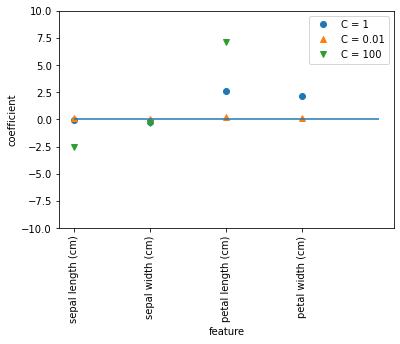

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import datasets


# 1 데이터 불러오기
iris_dataset = datasets.load_iris()


# 2 데이터 분할 - 이항 분류
X = iris_dataset.data[50:,:]
y = iris_dataset.target[50:]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 58)


# 3 모델링
logreg = LogisticRegression().fit(X_train, y_train)
logreg


# 4 결과 비교 C = 1.0
print("훈련 세트 점수 : {:.3f}".format(logreg.score(X_train,y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg.score(X_test,y_test)))
# 결과 : 훈련 세트 점수 : 0.986 테스트 세트 점수 : 0.933


# 5 parameter tuning
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

# 비용 적으면 훈련 약하게 -> 찍어 눌러서 0에 가깝게 만들어라 -> 강한 규제
# 비용 높으면 훈련 강하게 -> 0에 가깝게 만들지 말고 알아서 해라 ->약한 규제


# 5.1 C = 0.1 결과 비교 -> 낮은 코스트 -> 훈련 덜 복잡 -> 강한 규제 -> 과소적합
print("훈련 세트 점수 : {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg001.score(X_test, y_test)))
# 결과 : 훈련 세트 점수 : 0.529 테스트 세트 점수 : 0.500

# 5.2 C = 100 결과 비교 -> 높은 코스트 -> 훈련 더 복잡 -> 약한 규제 -> 과대적합
print("훈련 세트 점수 : {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg100.score(X_test, y_test)))
# 결과 : 훈련 세트 점수 : 0.986 테스트 세트 점수 : 0.933


# 6. 그래프
plt.plot(logreg.coef_.T, "o", label = "C = 1")
plt.plot(logreg001.coef_.T, "^", label = "C = 0.01")
plt.plot(logreg100.coef_.T, "v", label = "C = 100")
plt.xticks(range(iris_dataset.data.shape[1]), iris_dataset.feature_names, rotation=90)
plt.hlines(0,0,iris_dataset.data.shape[1])
plt.xlabel("feature")
plt.ylabel("coefficient")
plt.ylim(-10,10)
plt.legend()

# 그래프 결과가 0에 가까울 수록 규제가 강함 -> C값이 작을 수록 훈련 덜 복잡해서 강한 규제  (C = 0.01)
# 강한 규제는 피쳐(특징) 수를 줄이는 것

In [ ]:
from sklearn.model_selection import GridSearchCV

# 최적 C 값 도출 튜닝 수행-> CV는 3 Fold셋으로 설정 
# 낮은 코스트 -> 훈련 덜 복작 -> 강한 규제 -> 과소적합
# 높은 코스트 -> 훈련 더 복잡 -> 약한 규제 -> 과대적합
params = { 'C':[0.01, 0.1, 1, 5, 10]}
grid_cv_lr = GridSearchCV(lr_clf ,param_grid=params , cv=3 , scoring='accuracy' , verbose=1 )
grid_cv_lr.fit(X_train_tfidf_vect , y_train)
print('Logistic Regression best C parameter :',grid_cv_lr.best_params_ )

# 최적 C 값으로 학습된 grid_cv로 예측 수행하고 정확도 평가
pred = grid_cv_lr.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

# 로지스틱 회귀의 C가 10일 때 가장 좋은 예측 성능을 보임
# 최종적으로 이전보다 더 향상된 성능을 보인다

In [ ]:
# 사이킷런의  Pipeline 클래스를 이용하면 피처 벡터화와 ML 알고리즘 학습, 예측을 위한 코드 작성을 한번에 할 수 있다
from sklearn.pipeline import Pipeline

# TfidfVectorizer객체를 tfidf_vect객체명으로, LogisticRegression객체를 lr_clf객체명으로 생성하는 Pipeline생성
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300)),
    ('lr_clf', LogisticRegression(C=10))
])

# 별도의 TfidfVectorizer객체의 fit_transform( )과 LogisticRegression의 fit(), predict( )가 필요 없음. 
# pipeline의 fit( ) 과 predict( ) 만으로 한꺼번에 Feature Vectorization과 ML 학습/예측이 가능 -> 하지만 수행시간이 길다
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)
print('Pipeline을 통한 Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

# TF-IDF와 로지스틱 객체를 파이프라인으로 연결하였음
# GridSearchCV를 이용해 파이프라인을 입력하면서 최적의 파라미터를 찾을 수 있다. 
# 이때는 개별 객체의 하이퍼 파라미터를 구분하도록 Key값이 필요함

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('lr_clf', LogisticRegression())
])

# Pipeline에 기술된 각각의 객체 변수에 언더바(_)2개를 연달아 붙여 GridSearchCV에 사용될 
# 파라미터/하이퍼 파라미터 이름과 값을 설정
params = { 'tfidf_vect__ngram_range': [(1,1), (1,2), (1,3)],
           'tfidf_vect__max_df': [100, 300, 700],
           'lr_clf__C': [1,5,10]
}

# GridSearchCV의 생성자에 Estimator가 아닌 Pipeline 객체 입력
grid_cv_pipe = GridSearchCV(pipeline, param_grid=params, cv=3 , scoring='accuracy',verbose=1)
grid_cv_pipe.fit(X_train , y_train)
print(grid_cv_pipe.best_params_ , grid_cv_pipe.best_score_)

pred = grid_cv_pipe.predict(X_test)
print('Pipeline을 통한 Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

# 최적화한 파라미터를 기반으로 테스트 데이터 세트를 예측했지만 정확도는 크게 개선되지 않았다